In [1]:
# 🚗 Tunisia Cars Price Prediction — Linear Regression

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

In [2]:
# 2️⃣ Load Dataset
df = pd.read_csv('../data/raw/tunisia_cars_dataset.csv')
print(f'Dataset shape: {df.shape}')
display(df.head())

Dataset shape: (60000, 23)


,brand,model,year,mileage,fuel,gearbox,vehicle_condition,car_body,horsepower,engine_size,number_of_owners,accident_history,import_or_local,location,color,air_conditioning,parking_sensor,rear_camera,sunroof,alloy_wheels,bluetooth,gps,price
0,Skoda,Octavia,2013,109951,Essence,Manuelle,tres bon etat,SUV,202,2.6,1,0,local,Sidi Bouzid,noir,0,0,1,0,1,1,0,6315
1,Seat,Leon,2014,140294,Essence,Manuelle,tres bon etat,berline,169,2.0,2,0,local,Tozeur,vert,0,0,0,1,0,0,1,4603
2,Dacia,Dokker,2024,11848,Essence,Automatique,excellent,SUV,172,2.3,1,0,local,Siliana,rouge,1,1,1,0,0,0,1,19535
3,Hyundai,i20,2017,105169,Hybride,Manuelle,excellent,citadine,88,1.2,1,0,local,Medenine,rouge,0,0,0,0,1,0,0,10241
4,Renault,Duster,2016,150312,Essence,Manuelle,moyen,citadine,60,0.9,1,0,imported,Tataouine,bleu,0,0,0,0,1,1,1,7288


In [3]:
# 3️⃣ Basic Summary
df.info()
display(df.describe())
print('Missing values per column:')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              60000 non-null  object 
 1   model              60000 non-null  object 
 2   year               60000 non-null  int64  
 3   mileage            60000 non-null  int64  
 4   fuel               60000 non-null  object 
 5   gearbox            60000 non-null  object 
 6   vehicle_condition  60000 non-null  object 
 7   car_body           60000 non-null  object 
 8   horsepower         60000 non-null  int64  
 9   engine_size        60000 non-null  float64
 10  number_of_owners   60000 non-null  int64  
 11  accident_history   60000 non-null  int64  
 12  import_or_local    60000 non-null  object 
 13  location           60000 non-null  object 
 14  color              60000 non-null  object 
 15  air_conditioning   60000 non-null  int64  
 16  parking_sensor     600

,year,mileage,horsepower,engine_size,number_of_owners,accident_history,air_conditioning,parking_sensor,rear_camera,sunroof,alloy_wheels,bluetooth,gps,price
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,2015.183617,147114.528400,127.905350,1.611833,1.797750,0.148483,0.400250,0.400567,0.401267,0.400700,0.397467,0.398383,0.399150,13062.581933
std,5.733892,104400.123973,37.488092,0.490594,0.871201,0.355581,0.489953,0.490017,0.490159,0.490044,0.489378,0.489569,0.489728,14662.699763
min,2005.000000,3000.000000,60.000000,0.900000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000
25%,2010.000000,61346.250000,99.000000,1.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000
50%,2015.000000,128120.500000,125.000000,1.600000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8378.500000
75%,2020.000000,213081.250000,154.000000,1.900000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17259.250000
max,2024.000000,654833.000000,220.000000,3.300000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,121899.000000


Missing values per column:
brand                0
model                0
year                 0
mileage              0
fuel                 0
gearbox              0
vehicle_condition    0
car_body             0
horsepower           0
engine_size          0
number_of_owners     0
accident_history     0
import_or_local      0
location             0
color                0
air_conditioning     0
parking_sensor       0
rear_camera          0
sunroof              0
alloy_wheels         0
bluetooth            0
gps                  0
price                0
dtype: int64


C:\Users\21629\AppData\Local\Temp\ipykernel_9912\3149144770.py:15: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
c:\Learn Programming\MachineLearning\Car_Valuation_Tunisia\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


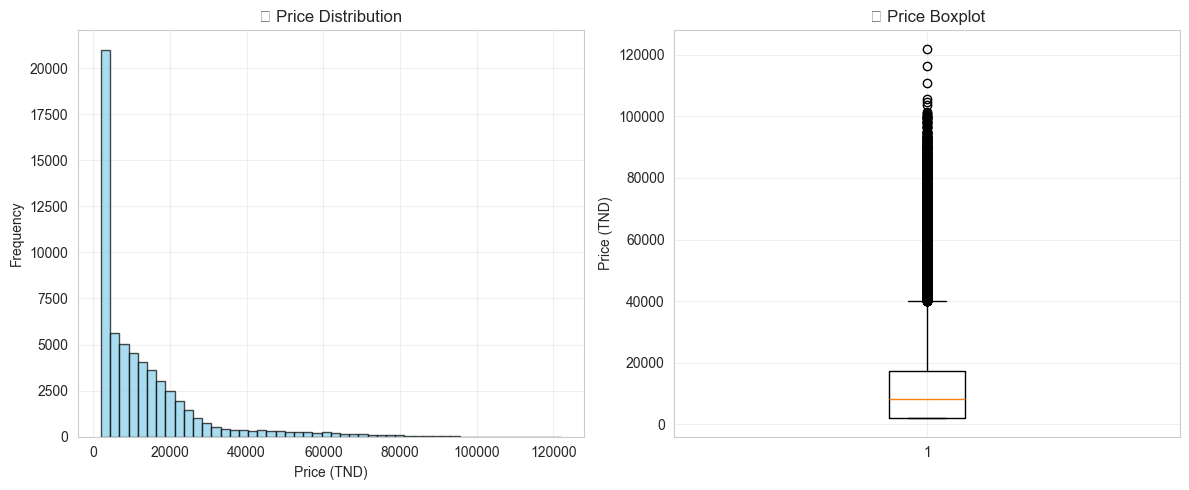

c:\Learn Programming\MachineLearning\Car_Valuation_Tunisia\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


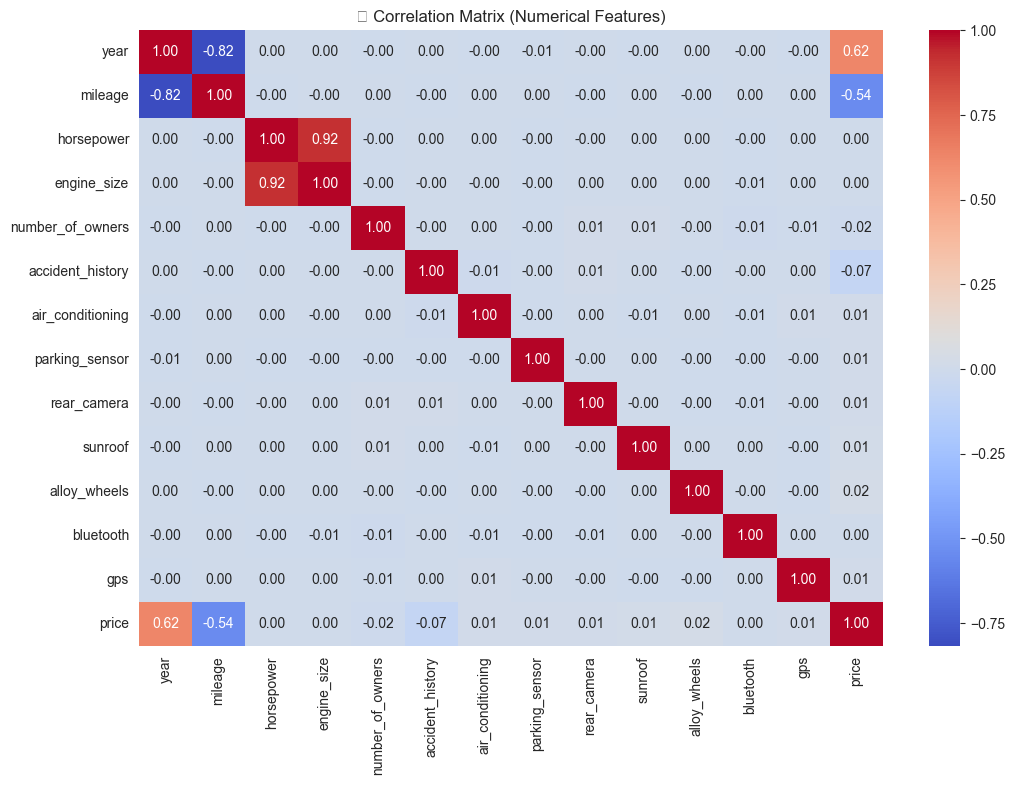

In [4]:
# 4️⃣ Key Graphs: Price Distribution & Numeric Correlations
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(df['price'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Price (TND)')
plt.ylabel('Frequency')
plt.title('💰 Price Distribution')
plt.grid(True, alpha=0.3)

plt.subplot(1,2,2)
plt.boxplot(df['price'], vert=True)
plt.ylabel('Price (TND)')
plt.title('💰 Price Boxplot')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('🔥 Correlation Matrix (Numerical Features)')
plt.show()

In [5]:
# 5️⃣ Feature Engineering
categorical_cols = ['brand','model','fuel','gearbox','vehicle_condition','car_body','import_or_local','location','color']
df['age'] = 2025 - df['year']
df['mileage_per_year'] = df['mileage'] / df['age'].replace(0,1)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']
print('Features:', X.shape, '| Target:', y.shape)

Features: (60000, 178) | Target: (60000,)


In [6]:
# 6️⃣ Split, Scale, Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_test = lin_reg.predict(X_test_scaled)

R²: 0.7737 | MAE: 4,861 TND | RMSE: 6,992 TND | MAPE: 97.87%


c:\Learn Programming\MachineLearning\Car_Valuation_Tunisia\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


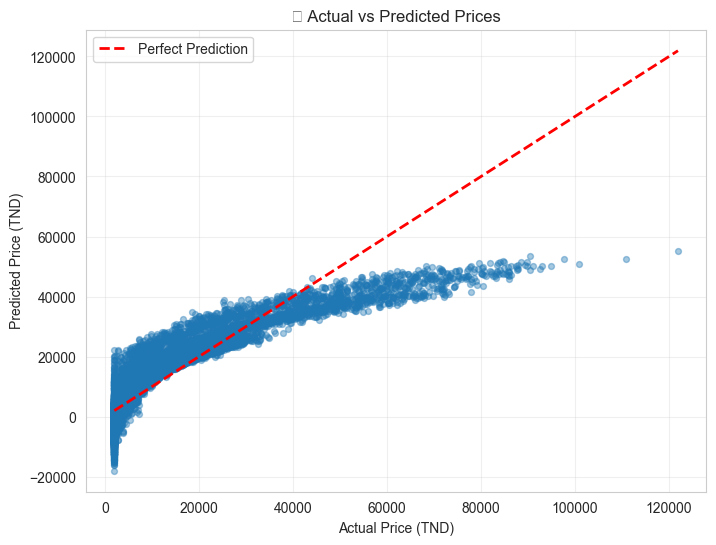

In [7]:
# 7️⃣ Model Performance + Key Plot
r2_test = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
print(f'R²: {r2_test:.4f} | MAE: {mae:,.0f} TND | RMSE: {rmse:,.0f} TND | MAPE: {mape:.2f}%')

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_test, alpha=0.4, s=18)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price (TND)')
plt.ylabel('Predicted Price (TND)')
plt.title('🎯 Actual vs Predicted Prices')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [8]:
# 8️⃣ Save Model Artifact for App
artifact = {
    'model_name': 'Linear Regression',
    'model': lin_reg,
    'scaler': scaler,
    'numeric_columns': numeric_cols,
    'feature_columns': X_train_scaled.columns.tolist(),
    'categorical_columns': ['brand','model','fuel','gearbox','vehicle_condition','car_body','import_or_local','location','color'],
    'engineered_features': ['age', 'mileage_per_year']
}
joblib.dump(artifact, '../models/linear_regression_tunisia_cars.pkl')
print("✓ Artifact saved at ../models/linear_regression_tunisia_cars.pkl")


✓ Artifact saved at ../models/linear_regression_tunisia_cars.pkl
